# 전복 나이 예측 경진대회
https://dacon.io/competitions/official/235877/data

### columns
#### 1. train.csv : 학습 데이터
- id : 샘플 아이디
- Gender : 전복 성별
- Lenght : 전복 길이
- Diameter : 전복 둘레
- Height : 전복 키 
- Whole : Weight : 전복 전체 무게
- Shucked Weight : 껍질을 제외한 무게
- Viscra Weight : 내장 무게
- Shell Weight : 껍질 무게
- Target : 전복 나이


#### 2. test.csv : 테스트 데이터
- id : 샘플 아이디
- Gender : 전복 성별
- Lenght : 전복 길이
- Diameter : 전복 둘레
- Height : 전복 키 
- Whole : Weight : 전복 전체 무게
- Shucked Weight : 껍질을 제외한 무게
- Viscra Weight : 내장 무게
- Shell Weight : 껍질 무게


3. sample_submission.csv : 제출 양식
- id : 샘플 아이디
- Target : 전복 나이

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns 
#경고 메시지 숨기기
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,1,M,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,2,I,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,3,I,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,4,M,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,5,I,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1253 non-null   int64  
 1   Gender          1253 non-null   object 
 2   Lenght          1253 non-null   float64
 3   Diameter        1253 non-null   float64
 4   Height          1253 non-null   float64
 5   Whole Weight    1253 non-null   float64
 6   Shucked Weight  1253 non-null   float64
 7   Viscra Weight   1253 non-null   float64
 8   Shell Weight    1253 non-null   float64
 9   Target          1253 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 98.0+ KB


In [5]:
set(train['Gender'].values)

{'F', 'I', 'M'}

- drop id column, 'Gender' column label encoding

In [6]:
train = train.drop(columns = 'id', axis = 1)
train['Gender'] = train['Gender'].map({'F':0, 'I':1, 'M':2})

In [7]:
train.head()

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,2,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,1,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,1,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,2,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,1,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


<AxesSubplot:>

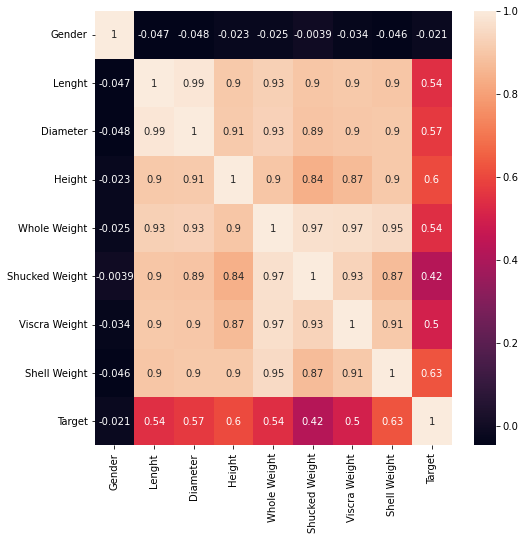

In [8]:
# 변수 간의 관계 확인
plt.figure(figsize=(8,8))
sns.heatmap(data = train.corr(), annot=True)

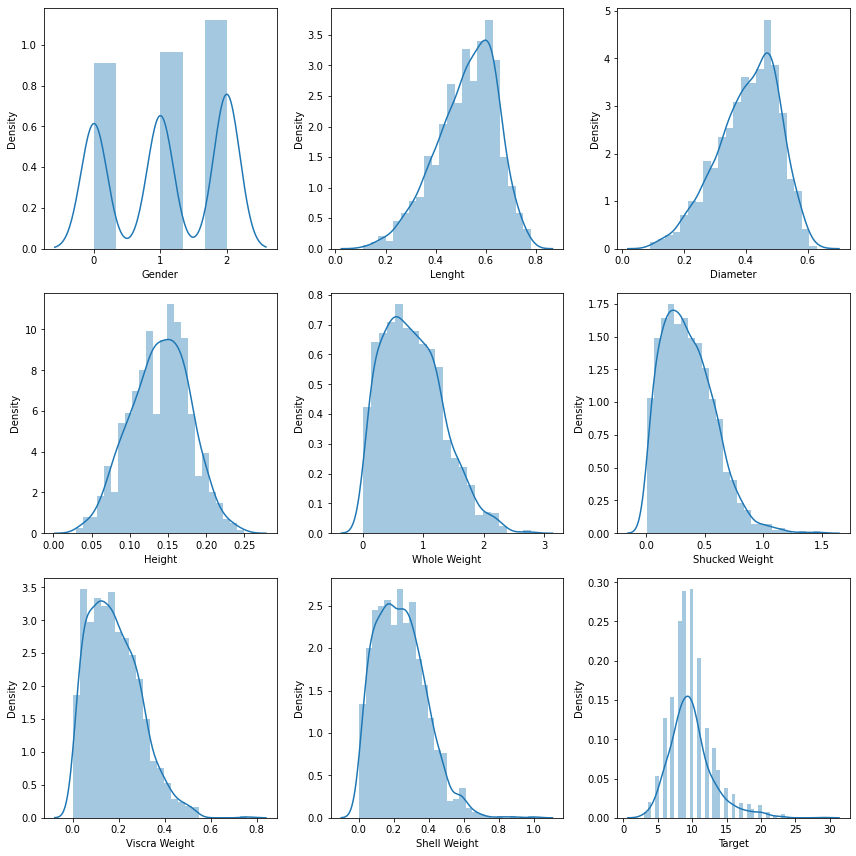

In [9]:
# 분포 확인
plt.figure(figsize=(12,12))
for i in range(0,9):
    plt.subplot(3,3,i+1)
    sns.distplot(train.iloc[:,i])
plt.tight_layout()
plt.show()

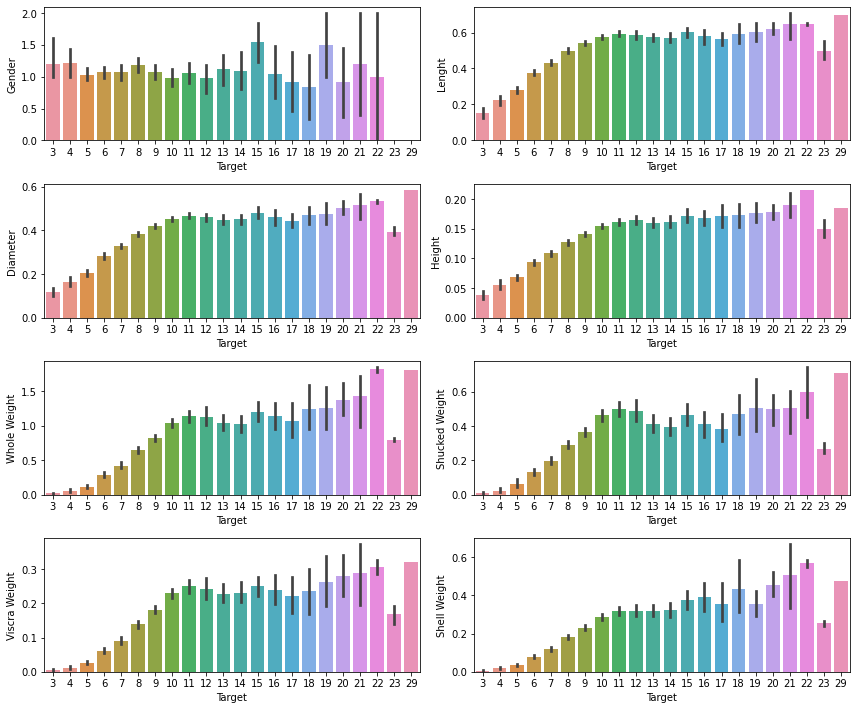

In [10]:
# 각 변수와 target 사이 분포 확인
plt.figure(figsize=(12,12))
for i in range(0,8):
    plt.subplot(5,2,i+1)
    # sns.distplot(traindf.iloc[:,i])
    sns.barplot(x = 'Target', y = train.columns[i], data = train)
plt.tight_layout()
plt.show()

# test data 확인

In [11]:
test = pd.read_csv('test.csv')

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2924 entries, 0 to 2923
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2924 non-null   int64  
 1   Gender          2924 non-null   object 
 2   Lenght          2924 non-null   float64
 3   Diameter        2924 non-null   float64
 4   Height          2924 non-null   float64
 5   Whole Weight    2924 non-null   float64
 6   Shucked Weight  2924 non-null   float64
 7   Viscra Weight   2924 non-null   float64
 8   Shell Weight    2924 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 205.7+ KB


- 위에서 한 전처리 같이 해줌

In [13]:
test = test.drop(columns = 'id', axis = 1)
test['Gender'] = test['Gender'].map({'F':0, 'I':1, 'M':2})

In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2924 entries, 0 to 2923
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2924 non-null   int64  
 1   Lenght          2924 non-null   float64
 2   Diameter        2924 non-null   float64
 3   Height          2924 non-null   float64
 4   Whole Weight    2924 non-null   float64
 5   Shucked Weight  2924 non-null   float64
 6   Viscra Weight   2924 non-null   float64
 7   Shell Weight    2924 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 182.9 KB


In [15]:
test.head()

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight
0,0,0.595,0.470,0.155,1.121,0.4515,0.1780,0.1550
1,2,0.580,0.450,0.150,0.927,0.2760,0.1815,0.3600
2,1,0.260,0.205,0.070,0.097,0.0415,0.0190,0.0305
3,2,0.590,0.460,0.130,1.102,0.4550,0.2055,0.3300
4,0,0.595,0.465,0.140,1.113,0.5175,0.2440,0.3050


# train data, test data

In [16]:
train_x = train.drop(['Target'], axis=1)
train_y = train.Target
test_x = test

In [17]:
train_x.shape, train_y.shape, test_x.shape

((1253, 8), (1253,), (2924, 8))

# model1 - RandomForestRegressor

In [18]:
from sklearn.ensemble import RandomForestRegressor
# 모델 initialize
model = RandomForestRegressor() 
# 모델 학습
model.fit(train_x, train_y)

RandomForestRegressor()

In [19]:
# test 데이터 예측
y_pred = model.predict(test_x)

In [20]:
y_pred

array([ 8.15, 12.47,  5.24, ...,  9.46, 10.6 , 11.3 ])

# model2 - RandomForestClassifier

In [21]:
from sklearn.ensemble import  RandomForestClassifier
# 모델 initialize
model = RandomForestClassifier()
# 모델 학습
model.fit(train_x, train_y)

RandomForestClassifier()

In [22]:
y_pred

array([ 8.15, 12.47,  5.24, ...,  9.46, 10.6 , 11.3 ])